## Porbabilistic Modelling MH Sampling

#### Importing the library

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import scipy.stats as ss

#### Defining the bar p (unnormalized distribution)

In [3]:
mean_p = np.array([4,4])
cov_p = np.array([[1,0.8],[0.8,1]])
dis_p = ss.multivariate_normal(mean = mean_p, cov = cov_p)
def p_bar(x):
    return dis_p.pdf(x)

In [172]:
def plot_ellipse(mu,cov, p, ax, color = "b--"):
    s = -2*np.log(1 - p);
    [D, V] = np.linalg.eig(cov * s);
    t = np.arange(0, 2*np.pi, 0.1);
    a = np.dot(V * np.sqrt((D)) , [np.cos(t[:]).T, np.sin(t[:]).T])
    ax.plot(a[0] + mu[0], a[1] + mu[1], color)

#### Visualizing the distribution

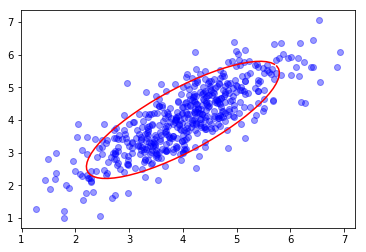

In [179]:
for i in range(500):
    x,y = dis_p.rvs()
    plt.plot(x,y,'bo', alpha = 0.4)
plot_ellipse(mean_p, cov_p, 0.8, plt, "r-")
plt.show()

#### Defining the proposal distribution

In [180]:
def q_pdf(x, z, sigma2):
    mean_q = np.array(z)
    cov_q = np.array([[sigma2,0],[0,sigma2]])
    dis_q = ss.multivariate_normal(mean = mean_q, cov = cov_q)
    return dis_q.pdf(x)
def q_rvs(z, sigma2):
    mean_q = np.array(z)
    cov_q = np.array([[sigma2,0],[0,sigma2]])
    dis_q = ss.multivariate_normal(mean = mean_q, cov = cov_q)
    return dis_q.rvs()

#### Defining the Acceptance function.

In [181]:
def A(z_star,z_l, sigma2):
    p_star = p_bar(z_star)
    p_l = p_bar(z_l)
    q_star_l = q_pdf(z_star, z_l,sigma2)
    q_l_star = q_pdf(z_l, z_star, sigma2)
    ratio = (p_star*q_l_star)/(p_l*q_star_l)
    acc_p = min(ratio,1)
    epsilon = np.random.uniform(0,1)
    if(epsilon > acc_p):
        return False
    else:
        return True

### Defining MH Sampling function

In [215]:
def get_MH_samples(n_samples = 100, sigma2 = 0.01):
    accepts = []
    len_rejects = 0
    z = np.array([0,0])
    while (len(accepts) < n_samples):
        sample = q_rvs(z, sigma2)
        if(A(sample, z, sigma2)):
            z = sample
            accepts.append(z)
        else:
            len_rejects += 1
    
    return accepts, len_rejects

## Sampling and plotting for different sigmas
#### This part may take some time as we are doing large number of sampling why dont you run all the cells below and go have some tea by then :).

In [218]:
def SampleAndPlot(sigma2):
    fig, ax = plt.subplots(1,3, figsize = [16,4])
    i = 0
    for sample_size in [100,1000,10000]:
        accepts, len_rejects = get_MH_samples(sample_size, sigma2 = sigma2)
        mean_s = np.mean(accepts, axis = 0)
        cov_s = np.cov(np.array(accepts).T)
        
        ax_i = ax[i]
        i+=1
        for accept in accepts:
            ax_i.plot(accept[0],accept[1],'bo',alpha = 0.1)
        
        plot_ellipse(mean_s, cov_s, 0.8, ax_i, "g-")
        plot_ellipse(mean_p, cov_p, 0.8, ax_i, "r-")
        ax_i.set_title("Sample size : " + str(sample_size))
    fig.suptitle("Samples at Variance : " +  str(sigma2))
    plt.savefig("s_"+str(sigma2)+".png")
    plt.show()
    print("Rejection rate : ",  len_rejects / (len(accepts) + len_rejects))

#### Sigma = 0.01

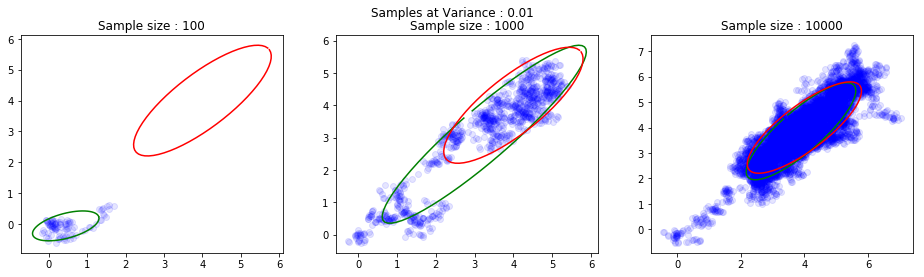

Rejection rate :  0.07518727457689818


In [219]:
SampleAndPlot(0.01)

#### Sigma = 1.0

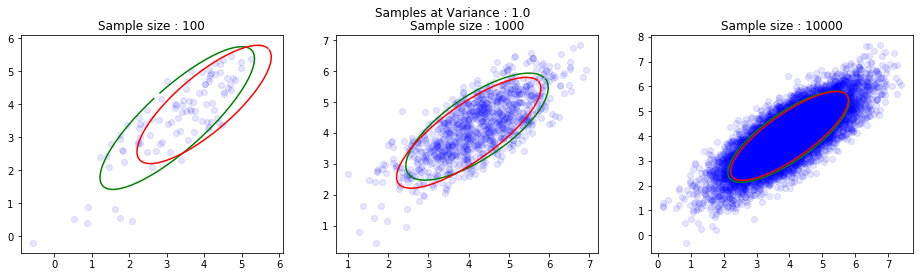

Rejection rate :  0.5987158908507223


In [220]:
SampleAndPlot(1.0)

#### Sigma = 100

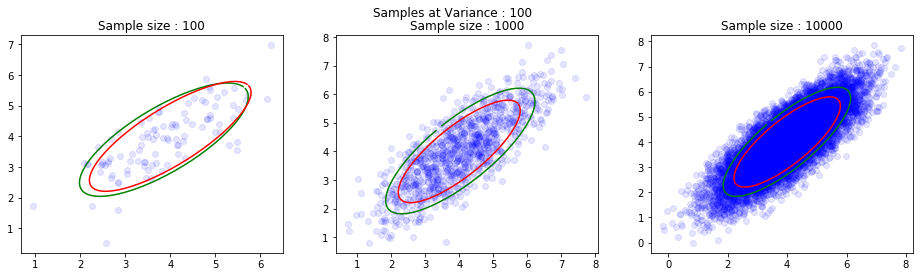

Rejection rate :  0.9883874459000136


In [221]:
SampleAndPlot(100)

### Thankyou by

>Abhishek Kumar

>18111002